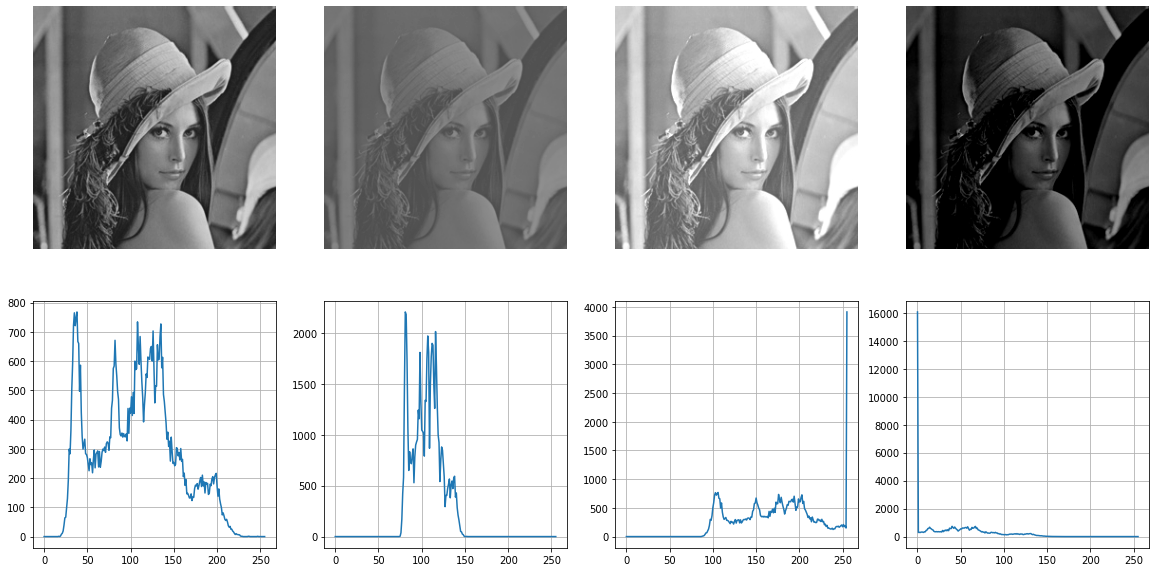

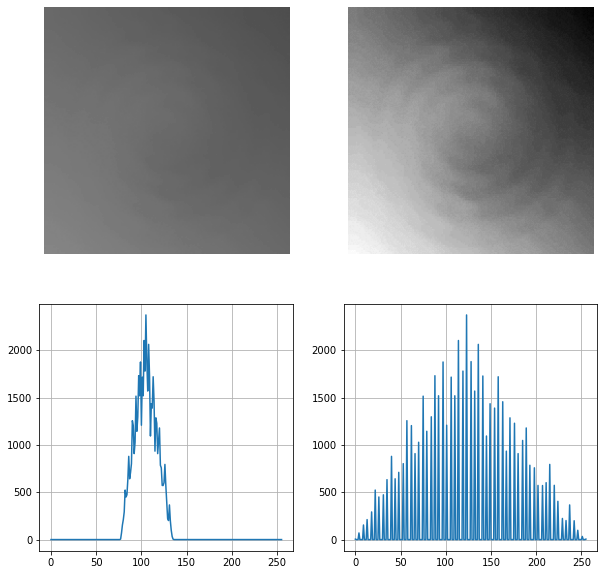

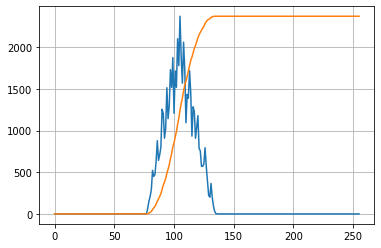

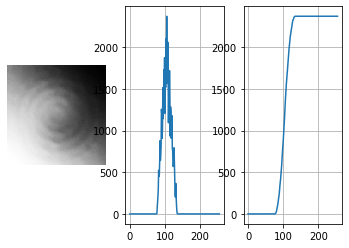

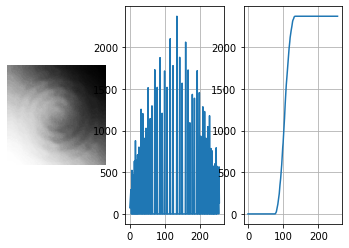

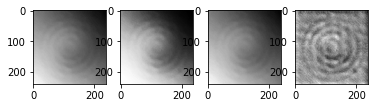

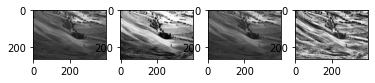

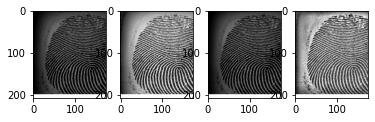

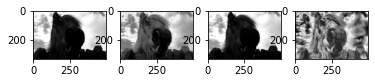

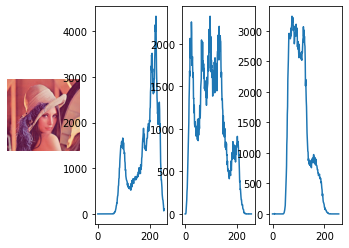

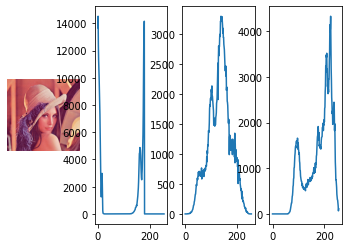

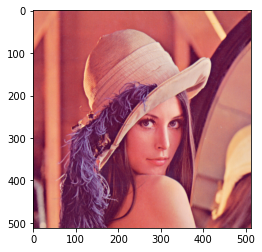

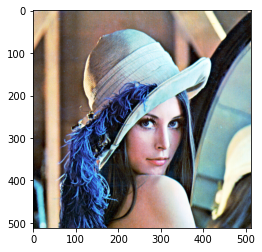

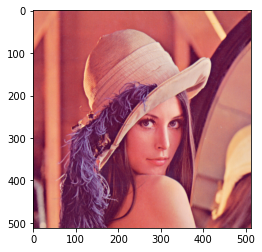

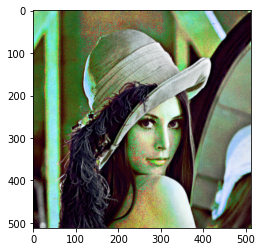

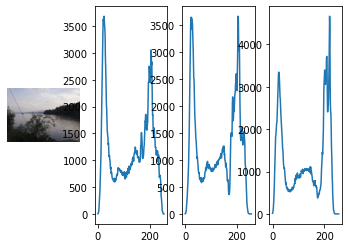

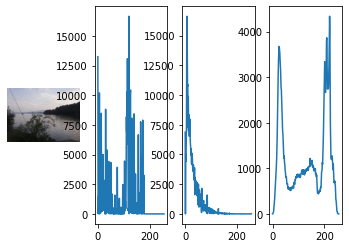

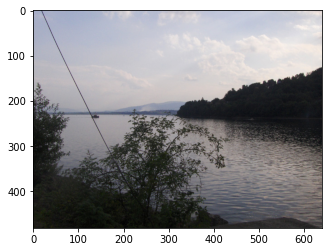

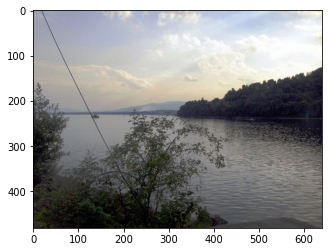

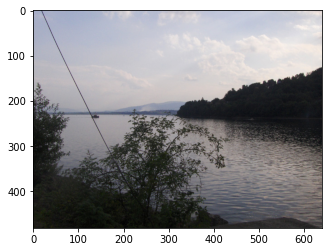

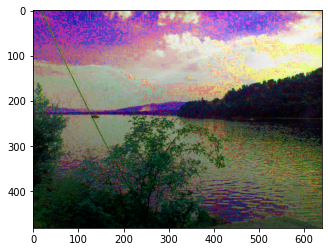

In [6]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

if not os.path.exists("lena1.bmp") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/lena1.bmp 

lena1 = cv2.imread('lena1.bmp', cv2.IMREAD_GRAYSCALE)

if not os.path.exists("lena2.bmp") :
    !wget  --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/lena2.bmp

lena2 = cv2.imread('lena2.bmp', cv2.IMREAD_GRAYSCALE)

if not os.path.exists("lena3.bmp") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/lena3.bmp 

lena3 = cv2.imread('lena3.bmp', cv2.IMREAD_GRAYSCALE)

if not os.path.exists("lena4.bmp") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/lena4.bmp 

lena4 = cv2.imread('lena4.bmp', cv2.IMREAD_GRAYSCALE)

# histogramy
H1 = cv2.calcHist([lena1],[0],None,[256],[0,256])
H2 = cv2.calcHist([lena2],[0],None,[256],[0,256])
H3 = cv2.calcHist([lena3],[0],None,[256],[0,256])
H4 = cv2.calcHist([lena4],[0],None,[256],[0,256])


figLena, axsLena = plt.subplots(2, 4)
figLena.set_size_inches(20, 10)

axsLena[0, 0].imshow(lena1, 'gray', vmin=0, vmax=256)
axsLena[0, 0].axis('off')
axsLena[1, 0].plot(H1)
axsLena[1, 0].grid()

axsLena[0, 1].imshow(lena2, 'gray', vmin=0, vmax=256)
axsLena[0,1].axis('off')
axsLena[1, 1].plot(H2)
axsLena[1, 1].grid()

axsLena[0,2].imshow(lena3, 'gray', vmin=0, vmax=256)
axsLena[0, 2].axis('off')
axsLena[1, 2].plot(H3)
axsLena[1, 2].grid()

axsLena[0, 3].imshow(lena4, 'gray', vmin=0, vmax=256)
axsLena[0, 3].axis('off')
axsLena[1, 3].plot(H4)
axsLena[1, 3].grid()



# drugie

if not os.path.exists("hist1.bmp") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/hist1.bmp 

hist1 = cv2.imread('hist1.bmp', cv2.IMREAD_GRAYSCALE)

if not os.path.exists("hist2.bmp") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/hist2.bmp 

hist2 = cv2.imread('hist2.bmp', cv2.IMREAD_GRAYSCALE)

if not os.path.exists("hist3.bmp") :
    !wget  --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/hist3.bmp 

hist3 = cv2.imread('hist3.bmp', cv2.IMREAD_GRAYSCALE)

if not os.path.exists("hist4.bmp") :
    !wget  --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/hist4.bmp 

hist4 = cv2.imread('hist4.bmp', cv2.IMREAD_GRAYSCALE)


# histogramy
new_hist1 = cv2.calcHist([hist1],[0],None,[256],[0,256])

arr = np.zeros(shape=(5,2))
normalized = cv2.normalize(hist1,arr,0,255,cv2.NORM_MINMAX)
histOfNormalized = cv2.calcHist([normalized],[0],None,[256],[0,256])



figLena, axsLena = plt.subplots(2, 2)
figLena.set_size_inches(10, 10)

axsLena[0, 0].imshow(hist1, 'gray', vmin=0, vmax=256)
axsLena[0, 0].axis('off')
axsLena[1, 0].plot(new_hist1)
axsLena[1, 0].grid()

axsLena[0, 1].imshow(normalized, 'gray', vmin=0, vmax=256)
axsLena[0, 1].axis('off')
axsLena[1, 1].plot(histOfNormalized)
axsLena[1, 1].grid()

# -----------------------------------------------------------------------#




hisCumSum = np.cumsum(new_hist1)
hisCumSum = hisCumSum * np.max(new_hist1) / np.max(hisCumSum)
figHistCum, axsHistCum = plt.subplots()
 
axsHistCum.plot(new_hist1)
axsHistCum.plot(hisCumSum)
axsHistCum.grid()


# ----------


X = cv2.LUT(hist1, hisCumSum)
fig, axs = plt.subplots(1,3)
axs[0].imshow(X,'gray')
axs[0].axis('off')
axs[1].plot(new_hist1)
axs[1].grid()
axs[2].plot(hisCumSum)
axs[2].grid()

# ##############################

equalized = cv2.equalizeHist(hist1)
h_equalized = cv2.calcHist([equalized], [0], None, [256], [0, 256])
cum = np.cumsum(new_hist1)
cum_h = cum * np.max(new_hist1) / np.max(cum)
f, a = plt.subplots(1, 3)
a[0].imshow(equalized, 'gray')
a[0].axis('off')
a[1].plot(h_equalized)
a[1].grid()
a[2].plot(cum_h)
a[2].grid()




# ----- CLAHE -------

clahe1 = cv2.createCLAHE()
cl1_equalized = cv2.equalizeHist(hist1)
tmp = np.zeros((hist1.shape[0],hist1.shape[1]))
cl1_normalized = cv2.normalize(hist1,tmp,0,255,cv2.NORM_MINMAX)
cl1_applied = clahe1.apply(hist1)

f_clahe1, a_clahe1 = plt.subplots(1,4)
a_clahe1[0].imshow(hist1,'gray')
a_clahe1[1].imshow(cl1_equalized,'gray')
a_clahe1[2].imshow(cl1_normalized,'gray')
a_clahe1[3].imshow(cl1_applied,'gray')





clahe2 = cv2.createCLAHE()
cl2_equalized = cv2.equalizeHist(hist2)
tmp = np.zeros((hist2.shape[0],hist2.shape[1]))
cl2_normalized = cv2.normalize(hist2,tmp,0,255,cv2.NORM_MINMAX)
cl2_applied = clahe2.apply(hist2)

f_clahe2, a_clahe2 = plt.subplots(1,4)
a_clahe2[0].imshow(hist2,'gray')
a_clahe2[1].imshow(cl2_equalized,'gray')
a_clahe2[2].imshow(cl2_normalized,'gray')
a_clahe2[3].imshow(cl2_applied,'gray')




clahe3 = cv2.createCLAHE()
cl3_equalized = cv2.equalizeHist(hist3)
tmp = np.zeros((hist3.shape[0],hist3.shape[1]))
cl3_normalized = cv2.normalize(hist3,tmp,0,255,cv2.NORM_MINMAX)
cl3_applied = clahe3.apply(hist3)

f_clahe3, a_clahe3 = plt.subplots(1,4)
a_clahe3[0].imshow(hist3,'gray')
a_clahe3[1].imshow(cl3_equalized,'gray')
a_clahe3[2].imshow(cl3_normalized,'gray')
a_clahe3[3].imshow(cl3_applied,'gray')


clahe4 = cv2.createCLAHE()
cl4_equalized = cv2.equalizeHist(hist4)
tmp = np.zeros((hist4.shape[0],hist4.shape[1]))
cl4_normalized = cv2.normalize(hist4,tmp,0,255,cv2.NORM_MINMAX)
cl4_applied = clahe4.apply(hist4)

f_clahe4, a_clahe4 = plt.subplots(1,4)
a_clahe4[0].imshow(hist4,'gray')
a_clahe4[1].imshow(cl4_equalized,'gray')
a_clahe4[2].imshow(cl4_normalized,'gray')
a_clahe4[3].imshow(cl4_applied,'gray')



# ---------- lenaRGB  ----

if not os.path.exists("lenaRGB.bmp") :
    !wget  --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/lenaRGB.bmp 


lenaBGR = cv2.imread('lenaRGB.bmp')
lenaRGB = cv2.cvtColor(lenaBGR,cv2.COLOR_BGR2RGB)
lena_h1 = cv2.calcHist([lenaRGB], [0], None, [256], [0, 256])
lena_h2 = cv2.calcHist([lenaRGB], [1], None, [256], [0, 256])
lena_h3 = cv2.calcHist([lenaRGB], [2], None, [256], [0, 256])
f_rgb,a_rgb = plt.subplots(1,4)
a_rgb[0].imshow(lenaRGB)
a_rgb[0].axis('off')
a_rgb[1].plot(lena_h1)
a_rgb[2].plot(lena_h2)
a_rgb[3].plot(lena_h3)



lenaHSV = cv2.cvtColor(lenaBGR,cv2.COLOR_BGR2HSV)
lena_h1 = cv2.calcHist([lenaHSV], [0], None, [256], [0, 256])
lena_h2 = cv2.calcHist([lenaHSV], [1], None, [256], [0, 256])
lena_h3 = cv2.calcHist([lenaHSV], [2], None, [256], [0, 256])
f_rgb,a_rgb = plt.subplots(1,4)
lenaRGB = cv2.cvtColor(lenaHSV,cv2.COLOR_HSV2RGB)
a_rgb[0].imshow(lenaRGB)
a_rgb[0].axis('off')
a_rgb[1].plot(lena_h1)
a_rgb[2].plot(lena_h2)
a_rgb[3].plot(lena_h3)
plt.show()


# skladowe
plt.imshow(lenaRGB)
plt.show()
x1 = cv2.equalizeHist(lenaRGB[:,:,0])
x2 = cv2.equalizeHist(lenaRGB[:,:,1])
x3 = cv2.equalizeHist(lenaRGB[:,:,2])
lenaRGB[:,:,0] = x1
lenaRGB[:,:,1] = x2
lenaRGB[:,:,2] = x3
plt.imshow(lenaRGB)
plt.show()


lenaHSV = cv2.cvtColor(lenaBGR, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(lenaHSV, cv2.COLOR_HSV2RGB))
plt.show()
x1 = cv2.equalizeHist(lenaHSV[:,:,0])
x2 = cv2.equalizeHist(lenaHSV[:,:,1])
x3 = cv2.equalizeHist(lenaHSV[:,:,2])
lenaHSV[:,:,0] = x1
lenaHSV[:,:,1] = x2
lenaHSV[:,:,2] = x3
plt.imshow(cv2.cvtColor(lenaHSV, cv2.COLOR_HSV2RGB))
plt.show()





# ---- jezioro ----

if not os.path.exists("jezioro.jpg") :
    !wget --no-check-certificate https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/jezioro.jpg 
        


lakeBGR = cv2.imread('jezioro.jpg')
lakeRGB = cv2.cvtColor(lakeBGR,cv2.COLOR_BGR2RGB)
lake_h1 = cv2.calcHist([lakeRGB], [0], None, [256], [0, 256])
lake_h2 = cv2.calcHist([lakeRGB], [1], None, [256], [0, 256])
lake_h3 = cv2.calcHist([lakeRGB], [2], None, [256], [0, 256])
f_rgb,a_rgb = plt.subplots(1,4)
a_rgb[0].imshow(lakeRGB)
a_rgb[0].axis('off')
a_rgb[1].plot(lake_h1)
a_rgb[2].plot(lake_h2)
a_rgb[3].plot(lake_h3)



lakeHSV = cv2.cvtColor(lakeBGR,cv2.COLOR_BGR2HSV)
lake_h1 = cv2.calcHist([lakeHSV], [0], None, [256], [0, 256])
lake_h2 = cv2.calcHist([lakeHSV], [1], None, [256], [0, 256])
lake_h3 = cv2.calcHist([lakeHSV], [2], None, [256], [0, 256])
f_rgb,a_rgb = plt.subplots(1,4)
lakeRGB = cv2.cvtColor(lakeHSV,cv2.COLOR_HSV2RGB)
a_rgb[0].imshow(lakeRGB)
a_rgb[0].axis('off')
a_rgb[1].plot(lake_h1)
a_rgb[2].plot(lake_h2)
a_rgb[3].plot(lake_h3)
plt.show()

# skladowe
plt.imshow(lakeRGB)
plt.show()
x1 = cv2.equalizeHist(lakeRGB[:,:,0])
x2 = cv2.equalizeHist(lakeRGB[:,:,1])
x3 = cv2.equalizeHist(lakeRGB[:,:,2])
lakeRGB[:,:,0] = x1
lakeRGB[:,:,1] = x2
lakeRGB[:,:,2] = x3
plt.imshow(lakeRGB)
plt.show()


lakeHSV = cv2.cvtColor(lakeBGR, cv2.COLOR_BGR2HSV)

plt.imshow(cv2.cvtColor(lakeHSV, cv2.COLOR_HSV2RGB))
plt.show()
x1 = cv2.equalizeHist(lakeHSV[:,:,0])
x2 = cv2.equalizeHist(lakeHSV[:,:,1])
x3 = cv2.equalizeHist(lakeHSV[:,:,2])
lakeHSV[:,:,0] = x1
lakeHSV[:,:,1] = x2
lakeHSV[:,:,2] = x3
plt.imshow(cv2.cvtColor(lakeHSV, cv2.COLOR_HSV2RGB))
plt.show()



